In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt

In [2]:
rootdir='sacct_outputs'
#rootdir='sacct_outputs_no_dupes' 
df=pd.read_hdf(os.path.join(rootdir, 'all.blosc.h5'))

In [3]:
#df_dupes = df[df.duplicated(['jobid'], keep=False)]

In [4]:
#df_dupes_sort = df_dupes.sort_values(by=['jobid', 'submit'], ascending=True)

In [5]:
#print len(df_dupes_sort)

In [6]:
#df_dupes_sort.to_csv(os.path,join(rootdir, 'duplicated.csv'),
#                     sep='|',
#                     header=False,
#                     index=False,
#                     date_format='%Y-%m-%dT%H:%M:%S')

In [7]:
#df_dupes_sort[df_dupes_sort['start'] < df_dupes_sort['submit']]
# df_probs = df[df['eligible'] < df['submit']]
# df_probs = df_probs.sort_values(by=['jobid', 'submit'], ascending=True)
# df_probs.to_csv(os.path.join(rootdir, 'df_eligible_less_submit.csv'),
#                 sep='|',
#                 header=False,
#                 index=False,
#                 date_format='%Y-%m-%dT%H:%M:%S')

In [8]:
df['delta'] = df['eligible']-df['submit']

In [9]:
print len(df[df['eligible'] <  df['submit']])

1696


In [10]:
df['delta'].min()

Timedelta('-41 days +17:39:28')

In [11]:
df[df['delta'] == pd.Timedelta('-41 days +17:39:28')]

,jobid,jobidraw,cluster,partition,account,group,gid,user,uid,submit,...,nnodes,ncpus,reqcpus,reqmem,reqgres,reqtres,timelimit,nodelist,jobname,delta
2325921,1261161,1261161,veredas,long,sgaufmg,testes,510,sgaufmg,1149,2013-12-16 16:49:11,...,1,1,1,1.95Gc,NaN,NaN,4 days 04:00:00,veredas62,script.sh,-41 days +17:39:28


In [12]:
df.ix[2325921]

jobid                    1261161
jobidraw                 1261161
cluster                  veredas
partition                   long
account                  sgaufmg
group                     testes
gid                          510
user                     sgaufmg
uid                         1149
submit       2013-12-16 16:49:11
eligible     2013-11-06 10:28:39
start        2014-07-24 00:58:18
end          2014-07-24 00:58:18
elapsed          0 days 00:00:00
exitcode                     0:0
state             CANCELLED by 0
nnodes                         1
ncpus                          1
reqcpus                        1
reqmem                    1.95Gc
reqgres                      NaN
reqtres                      NaN
timelimit        4 days 04:00:00
nodelist               veredas62
jobname                script.sh
delta         -41 days +17:39:28
Name: 2325921, dtype: object

In [13]:
df_outliers = df[df['eligible'] < df['submit']]

In [14]:
df_outliers['delta'].describe()

count                        1696
mean     -2 days +22:22:02.747051
std        2 days 06:19:21.306594
min            -41 days +17:39:28
25%             -2 days +22:20:30
50%             -1 days +19:51:53
75%      -1 days +23:01:35.750000
max             -1 days +23:59:50
Name: delta, dtype: object

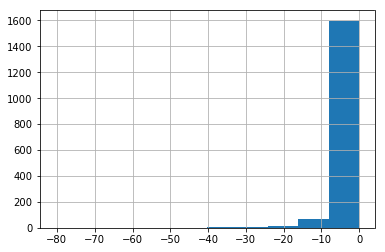

In [15]:
plt.figure();
(df_outliers['delta']/pd.Timedelta(hours=12)).hist()
plt.show()

In [16]:
df_outliers[df_outliers['elapsed']==pd.Timedelta(0)][['submit','eligible','start', 'end', 'elapsed', 'timelimit']].head(3)

,submit,eligible,start,end,elapsed,timelimit
17983,2011-08-10 16:03:51,2011-08-09 16:49:29,2011-08-10 16:23:01,2011-08-10 16:23:01,0 days,4 days 04:00:00
17986,2011-08-10 16:03:51,2011-08-09 16:49:30,2011-08-10 16:23:02,2011-08-10 16:23:02,0 days,4 days 04:00:00
18042,2011-08-10 16:03:51,2011-08-10 09:52:16,2011-08-10 16:23:01,2011-08-10 16:23:01,0 days,4 days 04:00:00


In [17]:
df_outliers[df['start']<df['submit']][['submit','eligible','start','end','elapsed','timelimit','state']]

/home/hpc/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


,submit,eligible,start,end,elapsed,timelimit,state
1086144,2012-10-01 14:39:22,2012-09-28 13:34:02,2012-09-28 13:34:06,2012-10-01 14:39:22,3 days 01:05:16,4 days 04:00:00,NODE_FAIL


Strategy
========
1. Exchange fields 'eligible' with 'submit'
2. Eliminate jobs with eligible<submit but elapsed=0
3. Discard job with JobId=1261161

In [18]:
idx = (df['eligible']<df['submit'])

In [19]:
# Changes df in loco
print  df.loc[idx][['submit','eligible']].head(10)
df.loc[idx,['submit', 'eligible']] = df.loc[idx,['eligible', 'submit']].values
print  df.loc[idx][['submit','eligible']].head(10)

                 submit            eligible
13  2011-06-01 22:28:43 2011-06-01 22:28:33
108 2011-06-01 22:29:29 2011-06-01 22:28:33
109 2011-06-01 22:35:09 2011-06-01 22:34:35
110 2011-06-01 22:53:14 2011-06-01 22:52:37
209 2011-06-02 18:14:12 2011-06-02 14:07:18
210 2011-06-02 18:14:12 2011-06-02 14:18:58
216 2011-06-02 18:14:12 2011-06-02 16:09:25
217 2011-06-02 18:06:34 2011-06-02 16:42:48
218 2011-06-02 18:06:37 2011-06-02 16:48:18
219 2011-06-02 18:06:37 2011-06-02 16:53:06
                 submit            eligible
13  2011-06-01 22:28:33 2011-06-01 22:28:43
108 2011-06-01 22:28:33 2011-06-01 22:29:29
109 2011-06-01 22:34:35 2011-06-01 22:35:09
110 2011-06-01 22:52:37 2011-06-01 22:53:14
209 2011-06-02 14:07:18 2011-06-02 18:14:12
210 2011-06-02 14:18:58 2011-06-02 18:14:12
216 2011-06-02 16:09:25 2011-06-02 18:14:12
217 2011-06-02 16:42:48 2011-06-02 18:06:34
218 2011-06-02 16:48:18 2011-06-02 18:06:37
219 2011-06-02 16:53:06 2011-06-02 18:06:37
